In [4]:
import numpy as np
from neville import *
from cubicSpline import *
from rational import *
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 14

f(1.1) = 1.326194027768301
f(1.2) = 1.3937578105774393
f(1.3) = 1.4693077069863734


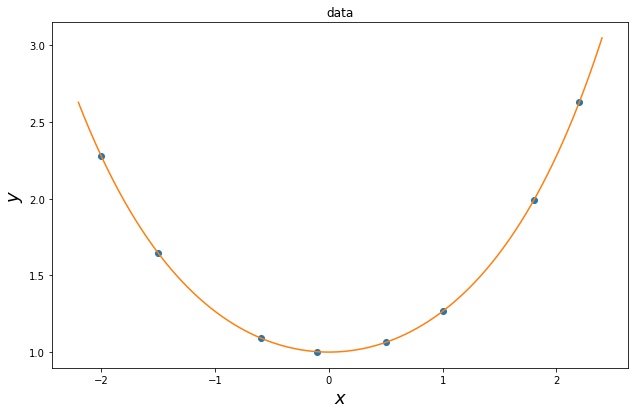

In [6]:
xData = np.array([-2.0, -0.1, -1.5, 0.5, -0.6, 2.2, 1.0, 1.8])
yData = np.array([2.2796, 1.0025, 1.6467, 1.0635, 1.0920, 2.6291, 1.2661, 1.9896])

print("f(1.1) =", neville(xData, yData, 1.1))
print("f(1.2) =", neville(xData, yData, 1.2))
print("f(1.3) =", neville(xData, yData, 1.3))

x = np.linspace(-2.2, 2.4, 1000)
y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = neville(xData, yData, x[i])

fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel(r"$x$",fontsize=18)
axes.set_ylabel(r"$y$",fontsize=18)
axes.set_title('data')
axes.plot(xData, yData, "o")
axes.plot(x, y)

# Problem 19

mu_k at T=10 is 1.4749813318705267
mu_k at T=30 is 0.8701478844582462
mu_k at T=60 is 0.4540810703195506
mu_k at T=90 is 0.31945286124506


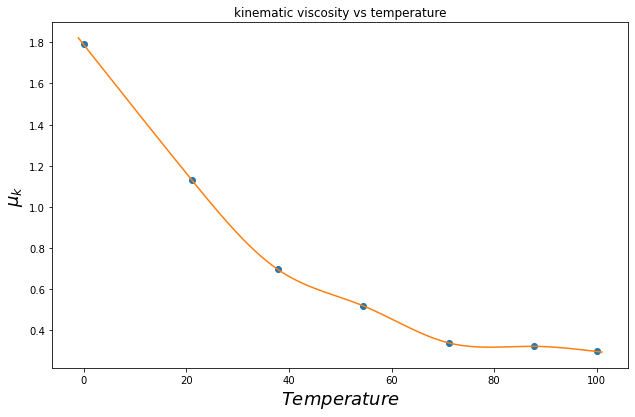

In [7]:
xData = np.array([0.0, 21.1, 37.8, 54.4, 71.1, 87.8, 100.0])
yData = np.array([1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296])

k = curvatures(xData, yData)
print("mu_k at T=10 is", evalSpline(xData, yData, k, 10))
print("mu_k at T=30 is", evalSpline(xData, yData, k, 30))
print("mu_k at T=60 is", evalSpline(xData, yData, k, 60))
print("mu_k at T=90 is", evalSpline(xData, yData, k, 90))

x = np.linspace(-1, 101, 5000)
y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = evalSpline(xData, yData, k, x[i])

fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel(r"$Temperature$",fontsize=18)
axes.set_ylabel(r"$\mu_k$",fontsize=18)
axes.set_title('kinematic viscosity vs temperature')
axes.plot(xData, yData, "o")
axes.plot(x, y)

# Problem 21

speed at resonance: 1965.4465446544652 rpm


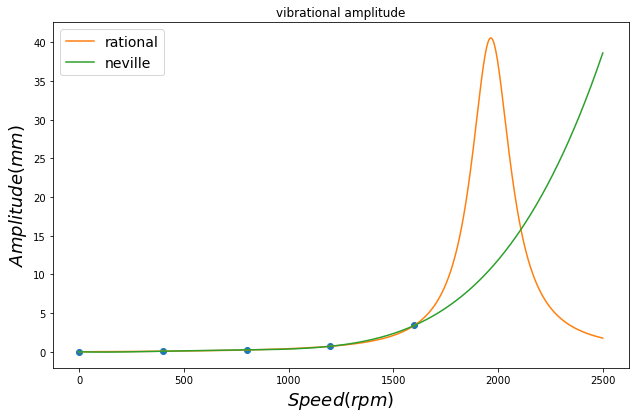

In [8]:
xData = np.array([0.0, 400.0, 800.0, 1200.0, 1600.0])
yData = np.array([0.0, 0.072, 0.233, 0.712, 3.400])

x = np.linspace(0, 2500, 10000)
y = np.zeros(len(x))
yNev = np.zeros(len(x))

for i in range(len(x)):
    y[i] = rational(xData, yData, x[i])
    yNev[i] = neville(xData, yData, x[i])

print("speed at resonance:", x[np.argmax(y)], "rpm")
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel(r"$Speed (rpm)$",fontsize=18)
axes.set_ylabel(r"$Amplitude (mm)$",fontsize=18)
axes.set_title('vibrational amplitude')
axes.plot(xData, yData, "o")
axes.plot(x, y, label="rational")
axes.plot(x, yNev, label="neville")
axes.legend(loc=2,fontsize=14)